**Task-2 : Unemployment Analysis**

**Dataset : Unemployment_Rate_upto_11_2020**

NAME : RINA GOHIL

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as gg
import plotly.express as exp
%matplotlib inline 

In [138]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [139]:
df.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [141]:
df.shape

(267, 9)

In [142]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [143]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [144]:
df = df.rename(columns={df.columns[0]:'State', df.columns[3]:'EUR' , df.columns[4]:'EE',df.columns[5]:'ELPR',df.columns[6]:'Area'})
df.head(1)

,State,Date,Frequency,EUR,EE,ELPR,Area,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74


In [145]:
# State with highest unemployment rate
df['State'].value_counts().idxmax()

'Andhra Pradesh'

In [146]:
# State with lowest unemployment rate
df['State'].value_counts().idxmin()

'Sikkim'

In [147]:
# Top 10 states with the highest unemployment
df1 = df[['State','EUR']].groupby('State').sum().sort_values('EUR' , ascending=False)

**Visualisation of this top 10 highest unemployment**

Text(0, 0.5, 'Number of people unemployement %')

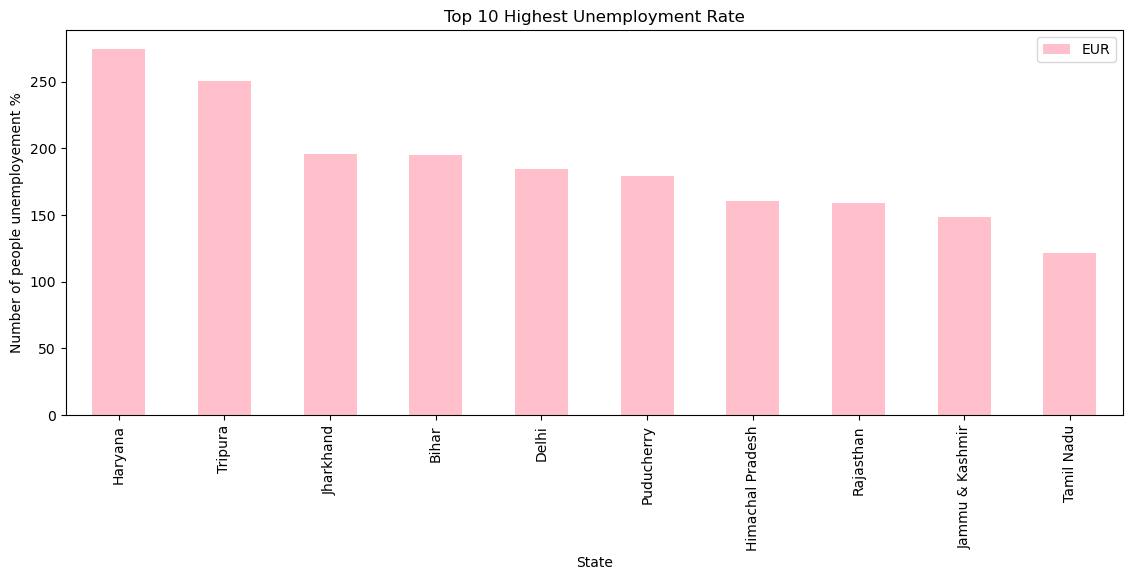

In [158]:
# Visualisation of this top 10 highest unemployment 

fig = plt.figure()
axb = fig.add_subplot(1,2,1)
df1[:10].plot(kind='bar' , color = 'pink' , figsize=(30,5), ax=axb)
axb.set_title('Top 10 Highest Unemployment Rate')
axb.set_xlabel('State')
axb.set_ylabel('Number of people unemployement %')

In [159]:
# Month of Employment
# This code converts the 'Date' coloumn to a datetime type,extracts months as integer, and adds a new coloumn with the corresponding three-letter month abbreviation

import datetime as dt
import calendar as cal

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  #This line converts the 'Date' coloumn in dataframe to datetime type.
df['month_int'] = df['Date'].dt.month              #This line extracts month component from 'Date' coloumn and assigns it to a new coloumn called 'month_int' in the dataframe df.
df['month'] = df['month_int'].apply(lambda x: cal.month_abbr[x])  #This line creates a mew coloumn 'month' in the dataframe df.


In [160]:
# month with the highest unemployment 
df['month'].value_counts().idxmax()

'Mar'

In [161]:
# Month with the lowest employment
df['month'].value_counts().idxmin()

'Jan'

In [162]:
# Month with the highest unemployment rate
df2 = df[['month','EUR']].groupby('month').sum().sort_values('EUR',ascending = False)

**Visualisation of this top 10 highest unemployment month**

Text(0, 0.5, 'Number of people unemployement %')

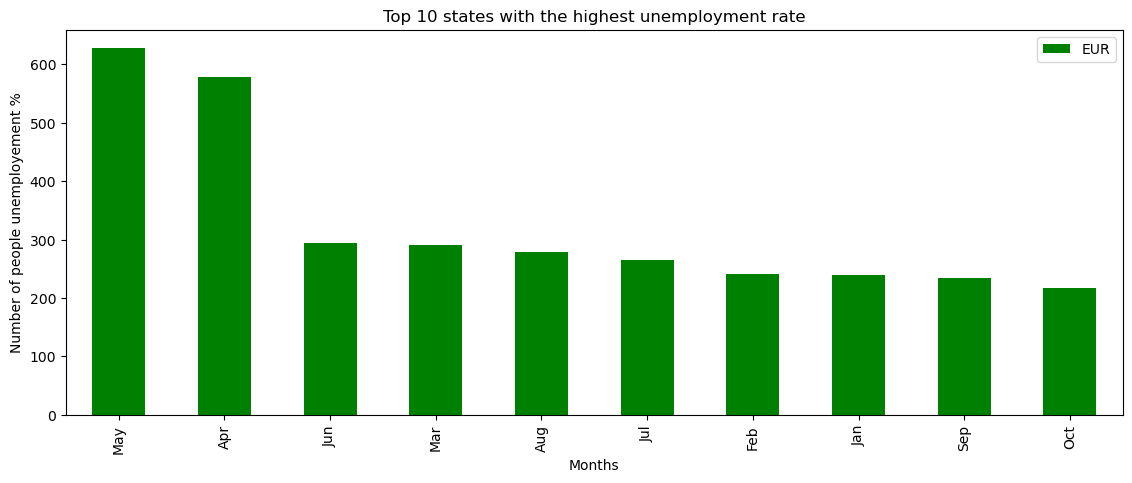

In [163]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df2[:12].plot(kind='bar' , color = 'green' , figsize = (30,5), ax = ax0)
ax0.set_title('Top 10 states with the highest unemployment rate')
ax0.set_xlabel('Months')
ax0.set_ylabel('Number of people unemployement %')

**Visualize labour participation rate & unemployment rate in each month**

In [164]:
#Visualize labour participation rate & unemployment rate in each month

df_EE = df.groupby(['month'])[['EUR','EE','ELPR']].mean()
df_EE = pd.DataFrame(df_EE).reset_index()
month = df_EE.month
unemployment_rate = df_EE['EUR']
labour_participation_rate = df_EE['ELPR']

fig = gg.Figure()

fig.add_trace(gg.Bar(x = month, y = unemployment_rate , name='Unemployment_Rate'))
fig.add_trace(gg.Bar(x = month , y = labour_participation_rate , name='Labour_Participation_Rate'))

fig.update_layout(title = 'Unemployment rate and labour participation rate' , xaxis = {'categoryorder':'array', 'categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']})

fig.show()

In [167]:
# state wise estimated employed
df3 = df[['State','EE']].groupby('State').sum().sort_values('EE', ascending=False)

**State wise estimated employed visualization**

Text(0, 0.5, 'number of Estimated Employed')

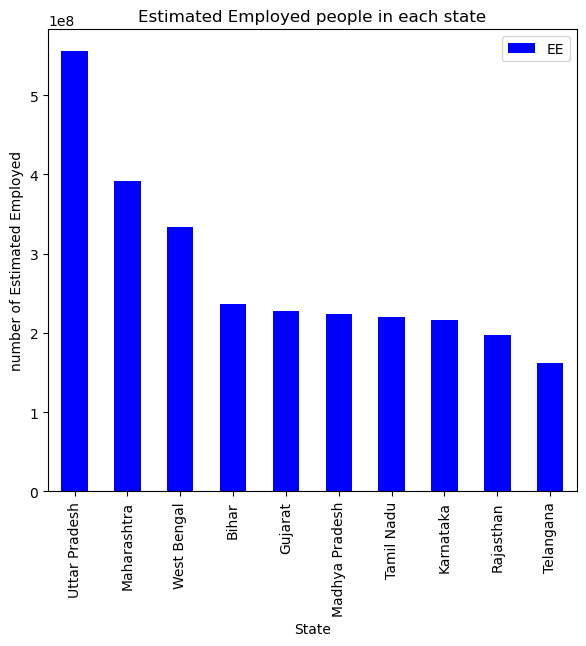

In [168]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1) 

df3[:10].plot(kind = 'bar', color='blue', figsize=(15,6), ax = ax1)
ax1.set_title('Estimated Employed people in each state')
ax1.set_xlabel('State')
ax1.set_ylabel('number of Estimated Employed')


In [169]:
# Month Wise Estimated Employed
df4 = df[['month','EE']].groupby('month').sum().sort_values(by='EE', ascending=False)

Text(0, 0.5, 'Number of Estimated Employed people')

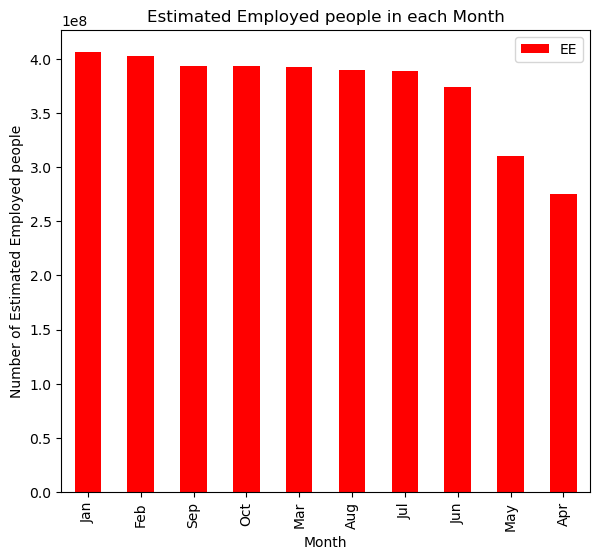

In [170]:
# Month wise Estimated Employed 

fig = plt.figure()
ax1 = fig.add_subplot(1,2,2) # Second subplot (ax1) will be positioned in the second coloumn

#Employed
df4[:10].plot(kind = 'bar', color='red',figsize=(15,6), ax=ax1)
ax1.set_title('Estimated Employed people in each Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Estimated Employed people')


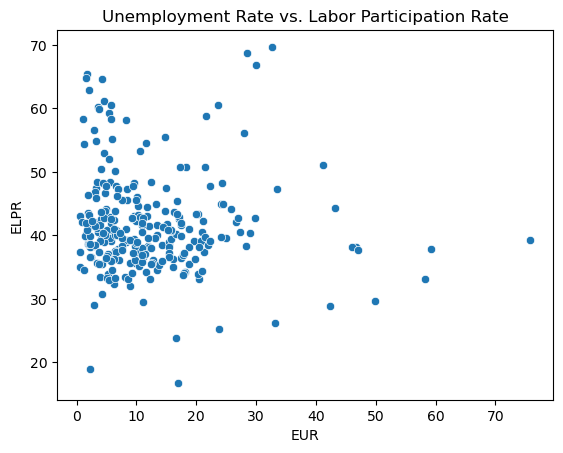

In [171]:
sns.scatterplot(x='EUR', y='ELPR', data=df)
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.show() 

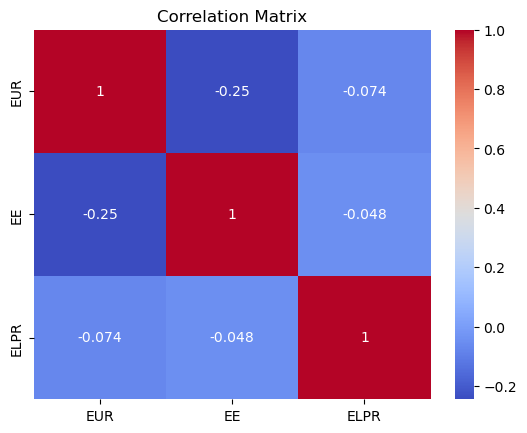

In [172]:
correlation_matrix = df[['EUR', 'EE', 'ELPR']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [173]:
# Barplot Unemployemnet Rate (Monthly)

fig = exp.bar(data_frame=df,x='State',y='EUR', animation_frame='month',color='State',title='Unemployment Rate of each month')

fig.update_layout(xaxis = {'categoryorder' : 'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000

fig.show()
